# Week 4: Visualizing Data 📊
## Tutorial

In the pre-module, you have seen just one example of a plot we can make using pandas ```hist()```. As you can imagine, technology can help us generate fantastic visualizations that would otherwise take a lot of time to refine and re-generate. Now it's your turn to learn to write the code that creates them!

In this module you will learn:
1. More plotting using pandas
2. Bivariate analysis 
3. Plotting heatmaps using seaborn

<span style="background-color: #FFD700">**Complete the code below to load the dataset.**</span>

In [2]:
import pandas as pd
df = # TODO: Complete the code here
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1.0,265000.00,1.9,130,1,0.0,1
1,55.0,0,7861,0,38,0.0,263358.03,1.1,136,1,0.0,1
2,65.0,0,146,0,20,0.0,162000.00,1.3,129,1,1.0,1
3,50.0,1,111,0,20,0.0,210000.00,1.9,137,1,0.0,1
4,65.0,1,160,1,20,0.0,327000.00,2.7,116,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1.0,155000.00,1.1,143,1,1.0,0
295,55.0,0,1820,0,38,0.0,270000.00,1.2,139,0,0.0,0
296,45.0,0,2060,1,60,0.0,742000.00,0.8,138,0,0.0,0
297,45.0,0,2413,0,38,0.0,140000.00,1.4,140,1,1.0,0


## Pandas plot

The ```hist()``` function you learned about in the pre-module notebook is a convenient function for generating historrams, but we can actually do much more visualization with the general plotting function for DataFrames, called **plot()**.


| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| plot() | kind, xlabel, ylabel, title | A plot of the data, using the specified kind of plot. | df.plot(kind, xlabel, ylabel, title) |
 
This function has many parameters you can specify and play with, but you do not need to worry about them for now. The important parameter we'd like to point out is ```kind```. Since plot() is a general plotting function, the **kind** parameter lets us specify what type of plot we want to produce. 

These types of plots are available:

**kind**
* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot (DataFrame only)
* ‘hexbin’ : hexbin plot (DataFrame only)

You can specify the axis labels and title on the plot by giving strings for the parameters ```xlabel```, ```ylabel```, and ```title```.

For example, if we wanted to plot a histogram for the ejection_fraction variable using plot() instead of hist(), we could specify it like this:

<Axes: title={'center': 'Histogram of ejection fraction'}, ylabel='Frequency'>

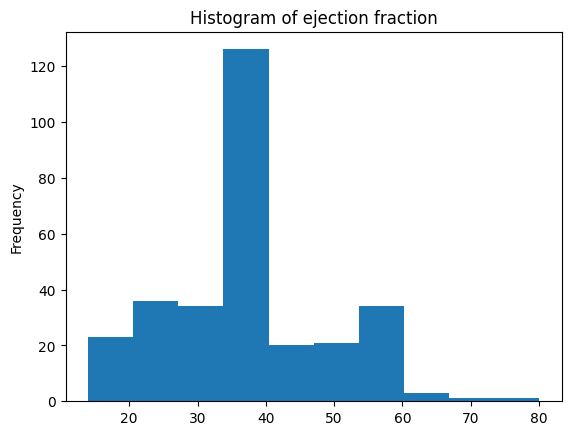

In [9]:
ef_hist = df['ejection_fraction'].plot(kind='hist', ylabel='Frequency', title='Histogram of ejection fraction')
ef_hist

Cool! What other kinds of plots can we make?

### Bar graph

Another way to examine the distribution of the data is through a bar graph. Say that instead of looking at the histogram of ejection_fraction (frequency of patients in each *bucket* of ejection fraction), we are now interested in how many patients there are for *every distinct* ejection fraction value. We can visualize the distribution using a bar graph with Number of Patients on the y-axis, and Ejection Fraction on the x-axis. We first use the ```value_counts()``` function to give us the frequency of each row in the ejection_fraction column, and then we plot the bar graph. 

Below is the result of value_counts() on the ejection fraction column. Run the cell below, and you should see all distinct values of ejection fraction (35 to 70) on the left hand column, with the corresponding frequency (number of patients) on the right column. Finally, ```sort_index()``` sorts the column values on the left in ascending order.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| value_counts() | n/a | The frequency of each row in the Series. | series.value_counts() |
| sort_index() | n/a | The Series sorted in ascending order. | series.sort_index() |

Remember that a Series in pandas is like a list of values. You can replace "series" in the syntax above with a row or column of a DataFrame.

In [82]:
ef_dist = df['ejection_fraction'].value_counts().sort_index()
ef_dist

14     1
15     2
17     2
20    18
25    36
30    34
35    49
38    40
40    37
45    20
50    21
55     3
60    31
62     2
65     1
70     1
80     1
Name: ejection_fraction, dtype: int64

**Q1.** Call the plot function on this result to generate a bar graph. You should label the y-axis "Number of Patients", and the x-axis "Ejection Fraction". 

<span style="background-color: #FFD700">**Complete the code below.**</span>

<Axes: xlabel='Ejection fraction', ylabel='Number of Patients'>

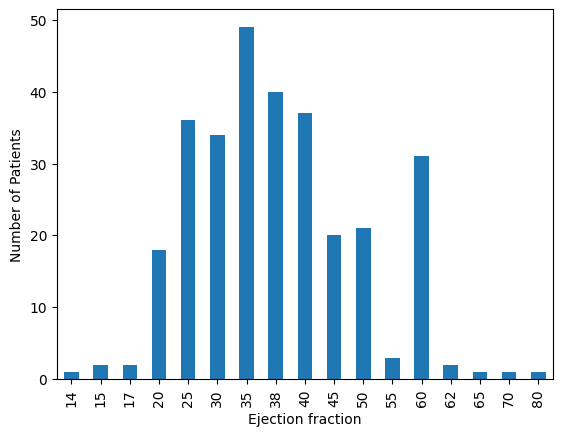

In [83]:
ef_dist.plot( # TODO: Complete this line )

### Stacked bar plot

As you carry on your research, you suspect that older patients might be at greater risk of death. You want to see what fraction of patients in each age group have died, versus the fraction that lived in that age group. How would you go about this?

First, we want to sort each patient into their age group, and record this age group in a new column in the DataFrame. Then, we should get the counts of deaths per age group. We can then divide the death count of an age group by the total number of patients in that group to get the fractions of patients who died in that age group. We have provided the code below to do this data manipulation, and save the fractions in ```age_death_fractions```.


<span style="background-color: #FFD700">**Run the code below.**</span>

In [12]:
# Create age groups
age_groups = [30, 40, 50, 60, 70, 80, 90, 100]
df['age_group'] = pd.cut(df['age'], bins=age_groups)

# Create a new DataFrame with counts of DEATH_EVENT for each age group
age_death_counts = df.pivot_table(index='age_group', columns='DEATH_EVENT', aggfunc='size', fill_value=0)
# Calculate the total count for each age group
total_counts = age_death_counts.sum(axis=1)
# Convert counts to fractions by dividing by the total count
age_death_fractions = age_death_counts.div(total_counts, axis=0)
age_death_fractions


DEATH_EVENT,0,1
age_group,,
"(30, 40]",1.000000,0.000000
"(40, 50]",0.716418,0.283582
"(50, 60]",0.715909,0.284091
"(60, 70]",0.752941,0.247059
"(70, 80]",0.470588,0.529412
"(80, 90]",0.333333,0.666667
"(90, 100]",0.000000,1.000000


We could go ahead and generate a bar graph at this point, as we did in the previous section:

<Axes: xlabel='age_group', ylabel='Fraction of patients'>

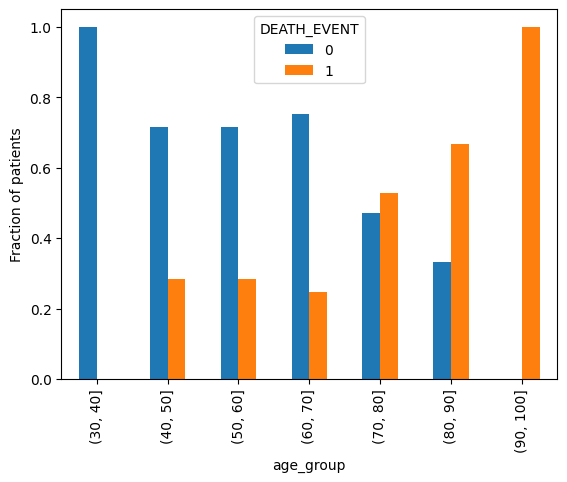

In [13]:
age_death_fractions.plot(kind="bar", ylabel='Fraction of patients')

**Q2.** This is alright as a visualization, but it could be easier/quicker to interpret it if we stacked the orange and blue bars. 

To stack the two results for each outcome (death/no death), we just have to specify ```stacked=True``` in addition to specifying the ```kind``` as a bar graph when we call the ```plot()``` function.


<span style="background-color: #FFD700">**Complete the code below to plot the data in ```age_death_fractions``` as a stacked bar graph.**</span>


<Axes: xlabel='age_group', ylabel='Fraction of patients'>

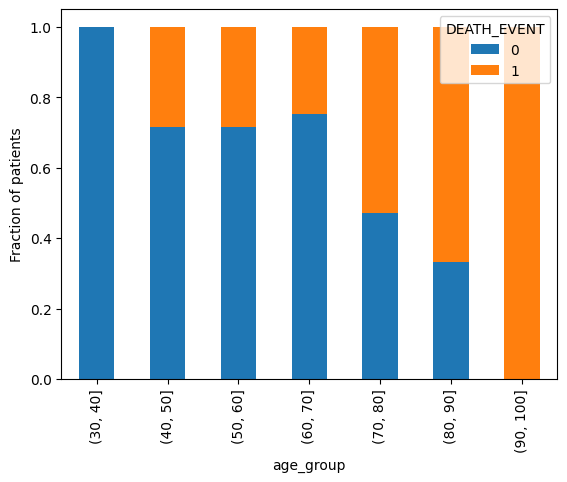

In [14]:
age_death_fractions.plot( # TODO: Complete this line)

**Q3.** What observations can you make about patients in the 70-79 age group?

<span style="background-color: #FFD700">**Write your answer here.**</span>


**Q4.** According to the stacked bar plot, do you think older age groups are at greater risk of death, as per your initial hypothesis? Support your answer with evidence from the plot. 

<span style="background-color: #FFD700">**Write your answer here.**</span>


**Q5.** View ```age_death_counts``` by printing in a separate code cell below. Note how many patients are in each age category, particularly the youngest and oldest groups. Why might you want to exclude these groups when creating a stacked bar plot with the fraction of patients?

<span style="background-color: #FFD700">**Write your answer here.**</span>


### Box plot

Boxplots are another very common type of plot to visualize distribution of data. To create a boxplot, we would specify ```box``` as the ```kind``` of plot when calling ```plot()``` on the column you want to plot. 

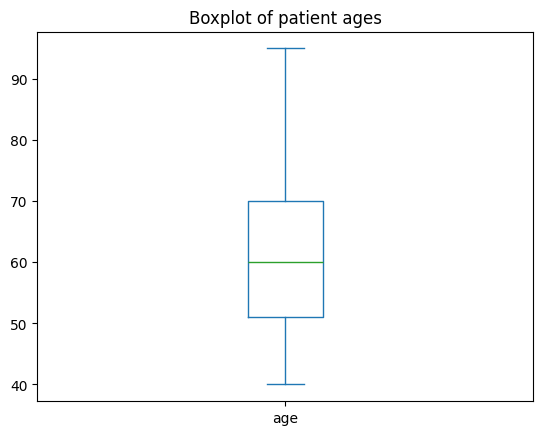

In [10]:
age_box = df['age'].plot(kind="box", title="Boxplot of patient ages")


Take a look at the boxplot. Here is how to interpret it:

Box: The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The height of the box indicates the spread of the middle 50% of the data.

Line inside the box: This line represents the median, which is the middle value of the dataset when it is sorted.

Whiskers: The whiskers extend from the box to the minimum and maximum values within a defined range. The range is often set as a multiple of the IQR. Any data points beyond the whiskers are considered potential outliers.

Outliers: Outliers will be shown as individual points outside of the box. In this boxplot, there are no outliers.

## Bivariate analysis

You've seen lots of ways to view the distribution of data with histograms, bar graphs, stacked bar graphs, and boxplots. However, there is so much more to data science than just distribution! We also wish to learn about the correlation between features in our dataset.

Bivariate analysis is useful when we want to know the relationship, or *correlation*, of two variables in the dataset. A correlation value falls between -1 and 1. The value can be interpreted as follows:

<span style="background-color: #AFEEEE">**-1 to 0:**</span>
 The two variables have a negative relationship; as one variable increases, the other decreases

<span style="background-color: #AFEEEE">**0:**</span>
 The two variables have no relationship with each other.

<span style="background-color: #AFEEEE">**0 to 1:**</span>
 The two variables have a positive relationship; as one variable increases, the other also increases.

This means that values near zero (regardless of the sign) are weakly correlated, and values near -1 or 1 are strongly correlated. 

Since there are 12 variables in our heart failure dataset, there can be 12 x 12 = 144 comparisons. The DataFrame function **corr()** generates a table of correlation values.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| corr() | n/a | A table of correlation values for each pair of features. | df.corr() |

<span style="background-color: #FFD700">**Run the code cell below.**</span>

In [88]:
df.corr()

C:\Users\skim4\AppData\Local\Temp\ipykernel_14036\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


Take a second to view the generated table. It is definitely not easy to see which are the highest or lowest correlation values from this table. We can pick out the strong correlations by creating a heatmap, which uses intensity of colors to easily distinguish between higher/lower values. Unfortunately, there are currently no great ways for people to generate heatmaps using the pandas library alone. For this reason we will introduce a different library to help us do bivariate analysis.


### Seaborn
Introducing: <span style="background-color: #AFEEEE">**Seaborn**</span>! Seaborn is a data visualization library with a special heatmap function. We import the seaborn library and use the <span style="background-color: #AFEEEE">**heatmap()**</span> function to visualize the above correlation table as a heatmap.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| heatmap() | data, annot, cmap (see documentation for more) | A heatmap object. | heatmap(data, annot, cmap) |

These parameters provide customization options for visualizing data in the heatmap:
* data (required): Represents the 2D dataset for the heatmap. This can be a NumPy array or a Pandas DataFrame. Index/column information in DataFrame is used for labeling.
* annot: Controls whether to display values in cells. If True, shows actual values; if an array is provided, uses it for annotation.
* cmap: Specifies the colormap for mapping data values to colors. Can be a colormap name, object, or list of colors. Default colormap depends on whether the center parameter is set.

There can be more parameters for further customization, but these are just a few we are using in this example.

**Q6.** Let's generate a heatmap of our dataset.
<span style="background-color: #FFD700">**Complete the code below.**</span>

C:\Users\skim4\AppData\Local\Temp\ipykernel_14036\2994699086.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, cmap='Blues')  # students should fill out the arguments in this line


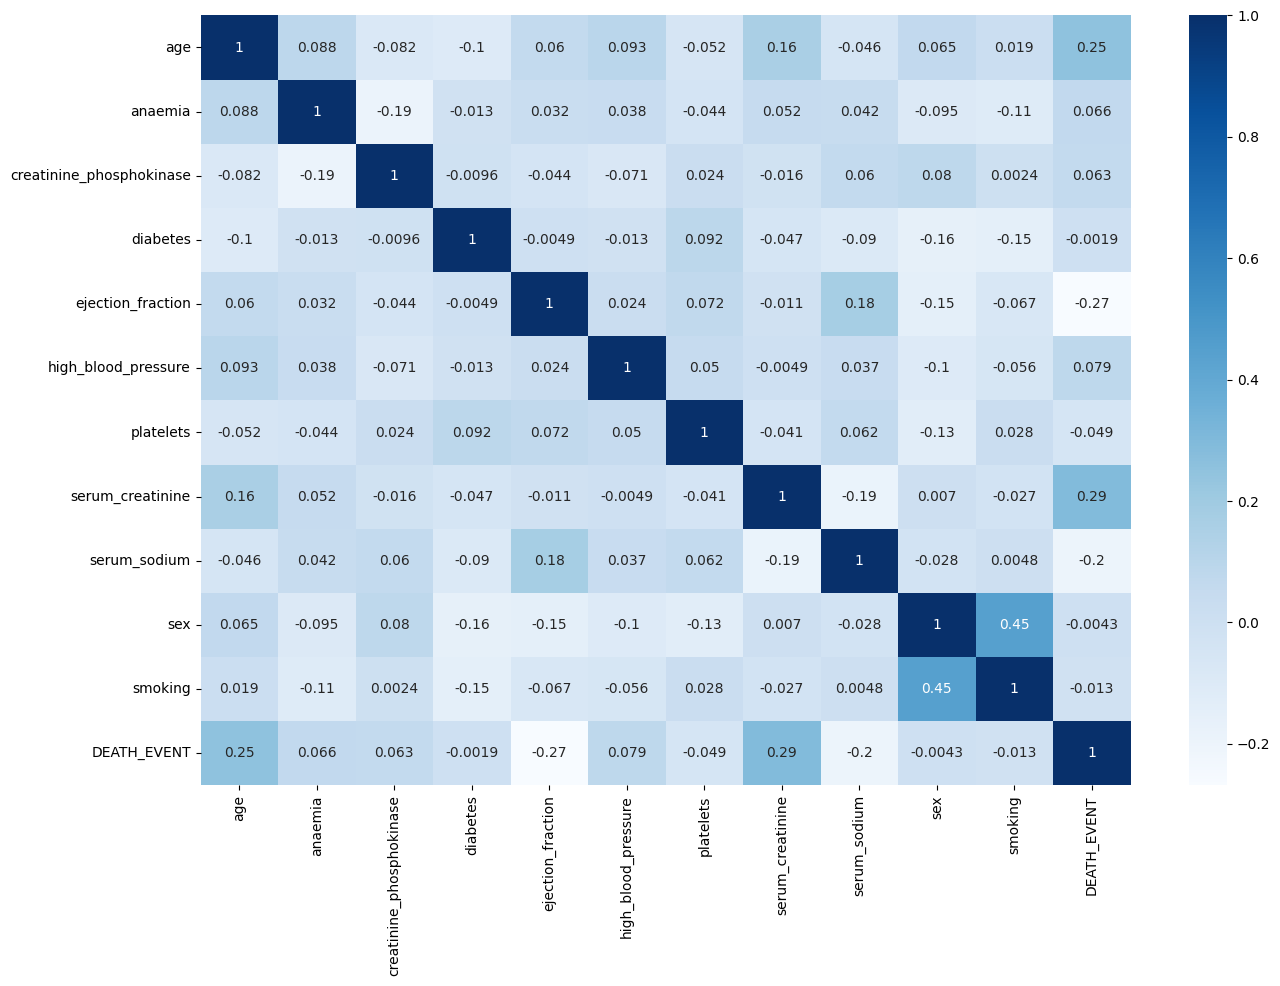

In [89]:
import seaborn as sns

# generate the heatmap
heatmap = sns.heatmap( # TODO: Complete this line )

# Resize the plot for better viewing
heatmap.figure.set_figwidth(15)
heatmap.figure.set_figheight(10)

As you can see, the darker the shade, the higher the value. We see 1's along the diagonal when we compare each variable against itself, as we discussed earlier. Exclude same-variable pairs when answering the questions below. 

**Q7.** Which pair of variables are most positively correlated? Explain what this means in your own words.

<span style="background-color: #FFD700">**Write your answer here.**</span>

**Q8.** Which pair of variables are second most positively correlated? Explain what this means in your own words.

<span style="background-color: #FFD700">**Write your answer here.**</span>

**Q9.** Which pair of variables are most negatively correlated? Explain what this means in your own words.

<span style="background-color: #FFD700">**Write your answer here.**</span>

**Q10.** Considering that values near 0 are weakly correlated, what do you think about the variables in this dataset based on the heatmap? Do you see more strong correlations or more weak correlations? Do you think this heatmap shows us a clear link between certain variables and patient death?

<span style="background-color: #FFD700">**Write your answer here.**</span>


### **Graded exercise** (5 marks total): 
We can create boxplots of data grouped by a column in the DataFrame. For example, what if we wanted to see the distribution of patient ages in the "death" category and "no death" category within DEATH_EVENT? We could generate a plot with two boxplots: one for death, and one for no death.

Complete the code below to create boxplots that show the distribution of patient ages for each category of DEATH_EVENT (death/no death), and answer the questions that follow. You will want to use a different pandas function for boxplots, called ```boxplot()```; it works in much the same way as ```plot(kind='box')```, but you will not have to specify the kind. There is currently more support for the ```boxplot()``` function in pandas.


| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| boxplot() | column, by | A boxplot of the specified column in the dataframe. | df.boxplot(column, by) |

* column: the column that the boxplot is generated for.
* by: the column that you wish to group the data by. One boxplot will be generated for each group.

**GQ1.** Complete the code below to create boxplots that show the distribution of patient ages for each category of DEATH_EVENT (death/no death). (3 marks)

<span style="background-color: #FFD700">**complete the code below**</span>

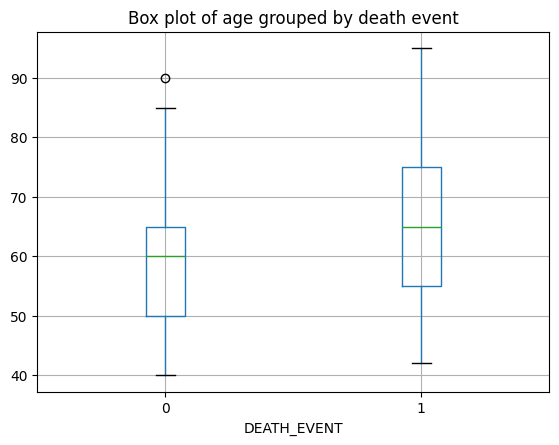

In [90]:

age_death_box = # TODO: Complete this line

# ignore this section; formatting fixes
import matplotlib.pyplot as plt
plt.title('Box plot of age grouped by death event')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

**GQ2.** Look at the boxplots you generated. What is the age range and median of patients who died and did not die? (1 mark)

<span style="background-color: #FFD700">**Write your answer here.**</span>


**GQ3.** Compare the boxplots to your stacked bar plot. Are your observations on the boxplots consistent with your analysis of the stacked bar plot? What do these plots suggest? (1 mark)

<span style="background-color: #FFD700">**Write your answer here.**</span>

## Conclusion

In this module you have learned:
1. Plotting using pandas
    * histogram
    * bar graph
    * stacked bar graph
    * box plot
2. Bivariate analysis 
3. Plotting heatmaps using seaborn

## Further Reading
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html 